In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/parkinsons.data')

# Display the first few rows
print(df.head(20))


              name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0   phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1   phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2   phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3   phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4   phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5   phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6   phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7   phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8   phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9   phon_R01_S02_4       95.056       120.103        91.226         0.00532   
10  phon_R01_S02_5       88.333       112.240        84.072         0.00505   
11  phon_R01_S02_6       91.904       115.871       

In [2]:
# Check dataset structure
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Display statistical summary
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [3]:
# Drop 'name' column as it's not useful
df = df.drop(columns=['name'])

# Define features (X) and target (y)
X = df.drop(columns=['status'])  # Features
y = df['status']                 # Target (0 or 1)

# Display shape of X and y
print(f"Features Shape: {X.shape}, Target Shape: {y.shape}")


Features Shape: (195, 22), Target Shape: (195,)


In [4]:
from sklearn.model_selection import train_test_split

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
print(f"Training Data Shape: {X_train.shape}, Testing Data Shape: {X_test.shape}")


Training Data Shape: (156, 22), Testing Data Shape: (39, 22)


In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data
X_test = scaler.transform(X_test)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



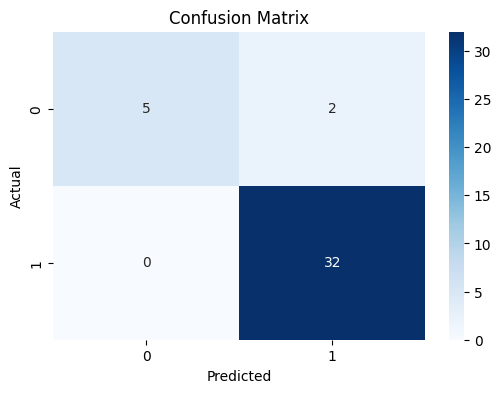

In [7]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [8]:
# testing for a new patient
new_patient = [11.992, 5.302, 14.997, 0.00784, 0.00007, 0.0370, 0.00554, 0.0140,
               0.1908, 0.64, 0.355, 211.093, 0.02184, 0.01908, 0.00143, 222.105, 0.426,
               0.141, 211.94, 0.00784, 0.7, 0.00370]

# Scale the new patient data
new_patient_scaled = scaler.transform([new_patient])

# Predict Parkinson’s status
predicted_status = model.predict(new_patient_scaled)
print("Predicted Status:", "Parkinson's" if predicted_status[0] == 1 else "Healthy")


Predicted Status: Parkinson's


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel='linear'),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"{name} Accuracy: {acc:.2f}")


Logistic Regression Accuracy: 0.90
SVM Accuracy: 0.87
Neural Network Accuracy: 0.95


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


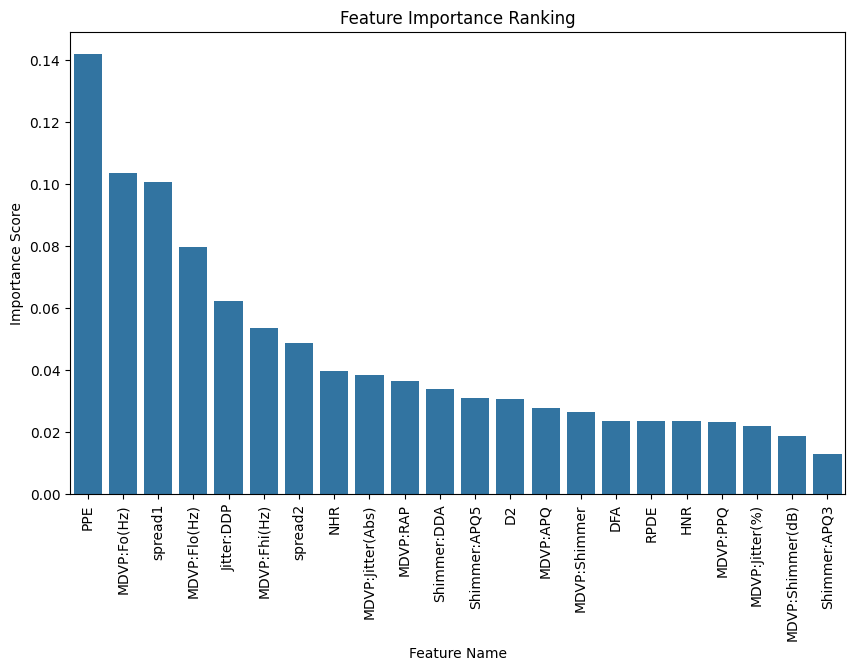

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf.feature_importances_

# Sort and plot feature importances
indices = np.argsort(feature_importances)[::-1]  # Sort in descending order
plt.figure(figsize=(10,6))
sns.barplot(x=X.columns[indices], y=feature_importances[indices])
plt.xticks(rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.title("Feature Importance Ranking")
plt.show()


In [11]:
# Select top 10 important features
important_features = X.columns[indices[:10]]
X_train_selected = X_train[:, indices[:10]]
X_test_selected = X_test[:, indices[:10]]

# Retrain Logistic Regression with selected features
log_reg = LogisticRegression()
log_reg.fit(X_train_selected, y_train)
y_pred = log_reg.predict(X_test_selected)
print(f"Logistic Regression Accuracy (Selected Features): {accuracy_score(y_test, y_pred):.2f}")


Logistic Regression Accuracy (Selected Features): 0.92


In [12]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit model
grid_search.fit(X_train, y_train)

# Get best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)
print(f"Tuned SVM Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Tuned SVM Accuracy: 0.90


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Initialize other models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"{name} Accuracy: {acc:.2f}")


Logistic Regression Accuracy: 0.90
Random Forest Accuracy: 0.95
Neural Network Accuracy: 0.95


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Retrain SVM on balanced data
best_svm.fit(X_train_balanced, y_train_balanced)
y_pred_balanced = best_svm.predict(X_test)
print(f"Tuned SVM Accuracy (Balanced Data): {accuracy_score(y_test, y_pred_balanced):.2f}")


Tuned SVM Accuracy (Balanced Data): 0.90


In [15]:
import joblib

# Save the best model
joblib.dump(best_svm, "parkinsons_svm_model.pkl")

# Load the model whenever needed
loaded_model = joblib.load("parkinsons_svm_model.pkl")

# Test with new data
new_patient_data = X_test[0].reshape(1, -1)
prediction = loaded_model.predict(new_patient_data)
print("Predicted:", "Parkinson's" if prediction[0] == 1 else "Healthy")


Predicted: Parkinson's


In [16]:
# Default SVM Model (Before Tuning)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_default = SVC()  # No hyperparameter tuning
svm_default.fit(X_train, y_train)
y_pred_default = svm_default.predict(X_test)

# Accuracy before tuning
default_accuracy = accuracy_score(y_test, y_pred_default)
print(f"Accuracy Before Tuning: {default_accuracy:.2f}")


Accuracy Before Tuning: 0.90


In [17]:
# Accuracy after tuning
tuned_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy After Tuning: {tuned_accuracy:.2f}")


Accuracy After Tuning: 0.95


In [18]:
print("Best Hyperparameters Found:", grid_search.best_params_)


Best Hyperparameters Found: {'C': 0.1, 'kernel': 'linear'}


In [19]:
cv_results = pd.DataFrame(grid_search.cv_results_)
print(cv_results[['param_C', 'param_kernel', 'mean_test_score']])


   param_C param_kernel  mean_test_score
0      0.1       linear         0.890726
1      0.1          rbf         0.737298
2      1.0       linear         0.858669
3      1.0          rbf         0.871573
4     10.0       linear         0.865323
5     10.0          rbf         0.884476


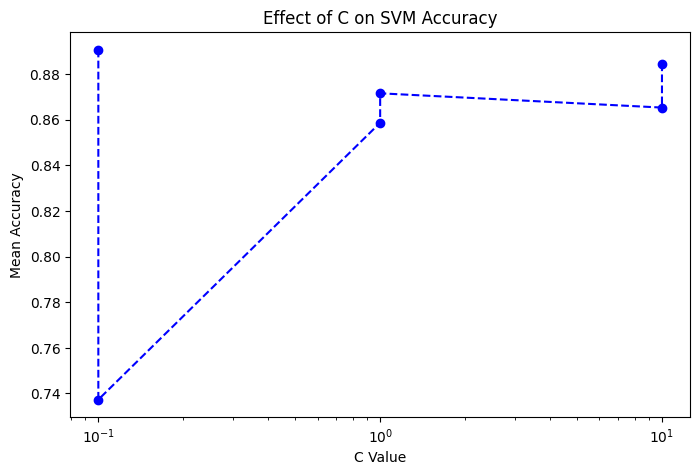

In [20]:
import matplotlib.pyplot as plt

# Extract values
C_values = cv_results["param_C"].astype(float)
scores = cv_results["mean_test_score"]

# Plot
plt.figure(figsize=(8,5))
plt.plot(C_values, scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("C Value")
plt.ylabel("Mean Accuracy")
plt.title("Effect of C on SVM Accuracy")
plt.xscale('log')  # Log scale for better visualization
plt.show()


In [21]:
import tensorflow as tf
from tensorflow import keras

# Build Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5828 - loss: 0.6672 - val_accuracy: 0.7436 - val_loss: 0.5345
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8544 - loss: 0.4650 - val_accuracy: 0.8205 - val_loss: 0.4407
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8895 - loss: 0.3871 - val_accuracy: 0.8205 - val_loss: 0.3878
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9145 - loss: 0.3294 - val_accuracy: 0.8205 - val_loss: 0.3554
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9112 - loss: 0.2325 - val_accuracy: 0.8462 - val_loss: 0.3301
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8855 - loss: 0.2844 - val_accuracy: 0.8205 - val_loss: 0.3177
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9317 - loss: 0.2378 - val_accuracy: 0.8462 - val_loss: 0.2949
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9532 - loss: 0.1855 - val_accuracy: 0.8718 - val_loss

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib

# Load dataset
df = pd.read_csv('/content/parkinsons.data')

# Drop the 'name' column
df = df.drop(columns=['name'])

# Define features (X) and target (y)
X = df.drop(columns=['status'])
y = df['status']

# Check feature correlation and remove highly correlated features
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.9  # Remove features with correlation > 0.9
high_corr_features = [column for column in upper.columns if any(upper[column] > threshold)]
X = X.drop(columns=high_corr_features)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Keep 95% variance
X_pca = pca.fit_transform(X_scaled)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Define models with hyperparameter tuning
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
param_grid_rf = {'n_estimators': [50, 100, 200]}
param_grid_lr = {'C': [0.1, 1, 10]}

models = {
    "Logistic Regression": GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1),
    "SVM": GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1),
    "Random Forest": GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
}

best_models = {}

for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    best_models[name] = model.best_estimator_
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Best Params: {model.best_params_}")
    print(f"{name} Accuracy: {acc:.2f}\n")
    print(classification_report(y_test, y_pred))

# Neural Network Model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, alpha=0.001, random_state=0, early_stopping=True)
mlp.fit(X_train_balanced, y_train_balanced)
y_pred_nn = mlp.predict(X_test)
print(f"Neural Network Accuracy: {accuracy_score(y_test, y_pred_nn):.2f}")

# Save the best models
for name, model in best_models.items():
    joblib.dump(model, f"best_{name.replace(' ', '_').lower()}.pkl")

# Save the scaler and PCA model
joblib.dump(scaler, "scaler.pkl")
joblib.dump(pca, "pca.pkl")

# Load and test a new patient
scaler = joblib.load("scaler.pkl")
pca = joblib.load("pca.pkl")
best_model = joblib.load("best_svm.pkl")  # Load the best model (e.g., SVM)

# Ensure new patient data has the same features as used in training
new_patient_data = np.array([11.992, 5.302, 14.997, 0.00784, 0.00007, 0.0370, 0.00554, 0.0140,
               0.1908, 0.64, 0.355, 211.093, 0.02184, 0.01908, 0.00143, 222.105, 0.426,
               0.141, 211.94, 0.00784, 0.7, 0.00370])

# Select only the features used in training
new_patient_data = new_patient_data[:X.shape[1]]

# Convert to numpy array and reshape
new_patient_processed = np.array(new_patient_data).reshape(1, -1)

# Preprocess the new sample
test_patient_scaled = scaler.transform(new_patient_processed)
test_patient_pca = pca.transform(test_patient_scaled)

# Predict
predicted_status = best_model.predict(test_patient_pca)
print("Predicted Status:", "Parkinson's" if predicted_status[0] == 1 else "Healthy")

Logistic Regression Best Params: {'C': 10}
Logistic Regression Accuracy: 0.69

              precision    recall  f1-score   support

           0       0.44      0.80      0.57        10
           1       0.90      0.66      0.76        29

    accuracy                           0.69        39
   macro avg       0.67      0.73      0.67        39
weighted avg       0.79      0.69      0.71        39

SVM Best Params: {'C': 10, 'kernel': 'rbf'}
SVM Accuracy: 0.90

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       1.00      0.86      0.93        29

    accuracy                           0.90        39
   macro avg       0.86      0.93      0.88        39
weighted avg       0.93      0.90      0.90        39

Random Forest Best Params: {'n_estimators': 100}
Random Forest Accuracy: 0.90

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1   

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
